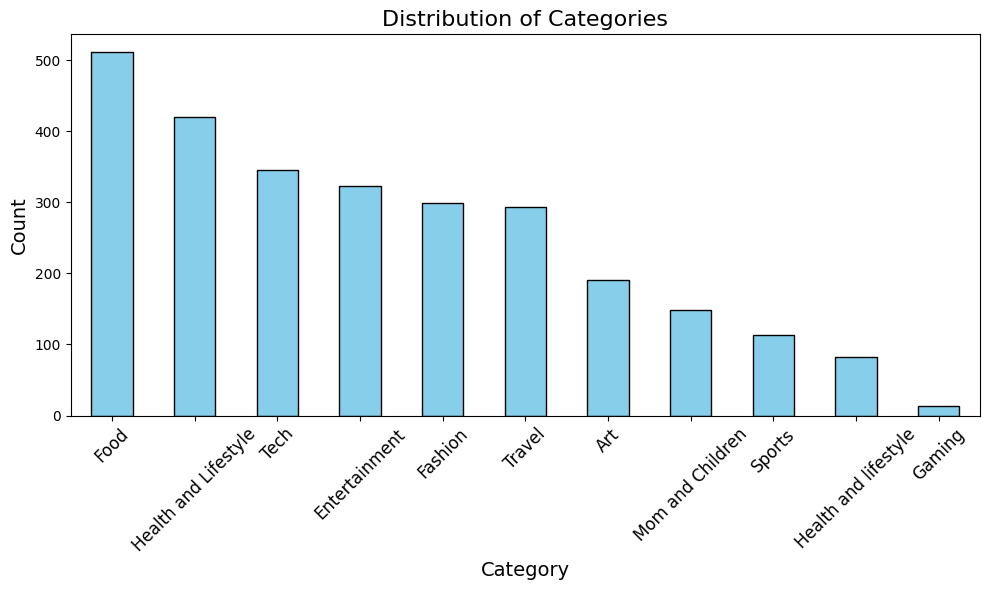

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
# Replace 'your_file.csv' with the path to your actual file
df = pd.read_csv('train-classification.csv', header=None, names=['Account', 'Category'])

# Count the occurrences of each category
category_counts = df['Category'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Categories', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


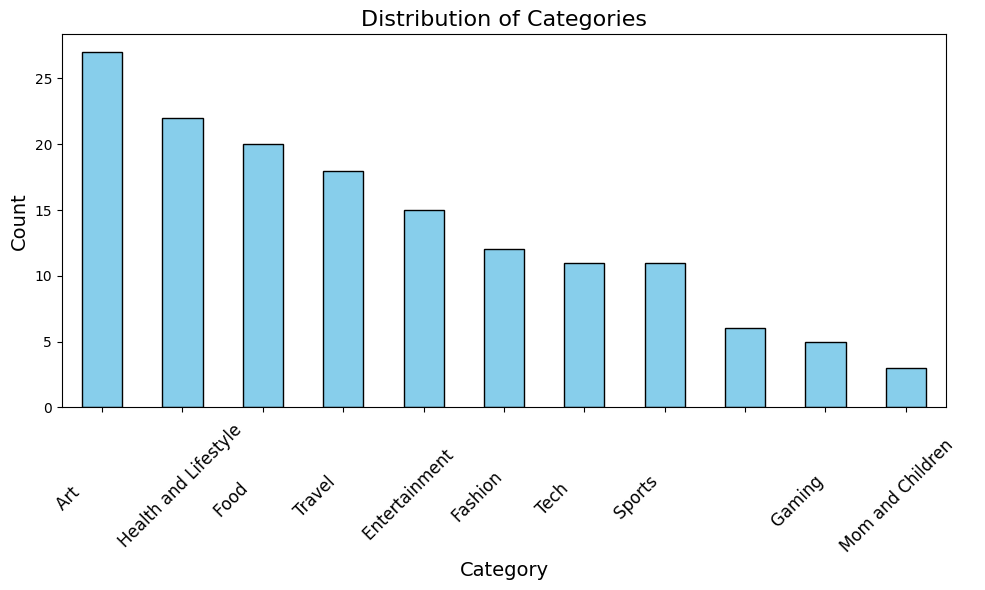

In [4]:
df = pd.read_csv('annotated_users_CS412-bed39b6e0259.csv', header=None, names=['Account', 'Category'])

# Count the occurrences of each category
category_counts = df['Category'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Categories', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

In [9]:
import pandas as pd
import json

# Paths to files
csv_file = 'test-classification-round3.csv'  
json_file = 'training-dataset.jsonl/training-dataset.jsonl'  
output_file = 'test_datap3.csv'  

# Read the CSV file
csv_data = pd.read_csv(csv_file, names=["username"])

# Strip whitespaces in the username column
csv_data['username'] = csv_data['username'].str.strip()

# Create a dictionary to store JSON data for quick lookup
user_data_dict = {}

# Read the JSON file line by line and build a dictionary
with open(json_file, 'r') as f:
    for line in f:
        try:
            user_data = json.loads(line.strip())  # Load the JSON object from each line
            username = user_data.get('profile', {}).get('username', None)
            if username:
                user_data_dict[username.strip()] = user_data
        except json.JSONDecodeError as e:
            print(f"Skipping invalid JSON line: {line.strip()}")
        except Exception as e:
            print(f"Error processing line: {line.strip()} | Error: {e}")

# Create an empty list to store rows for the DataFrame
data = []

# Iterate through usernames in the CSV
for _, row in csv_data.iterrows():
    username = row['username']
    
    if username in user_data_dict:
        user_data = user_data_dict[username]
        
        # Extract relevant fields
        biography = user_data.get('profile', {}).get('biography', '') or ''  # Default to empty string
        category_name = user_data.get('profile', {}).get('category_name', None)
        category_name = category_name.strip() if category_name else ''  # Handle null values
        
        # Extract captions; handle missing captions in posts
        captions = [
            post.get('caption', '').strip() if post.get('caption') else '' 
            for post in user_data.get('posts', [])
        ] if 'posts' in user_data else []
        
        # Append the data
        data.append({
            'username': username,
            'biography': biography,
            'category_name': category_name,
            'captions': captions
        })
    else:
        print(f"Error: Username '{username}' not found in the JSON file.")


df = pd.DataFrame(data)

df.to_csv(output_file, index=False)

print(f"DataFrame saved to {output_file}")


DataFrame saved to test_datap3.csv


In [4]:
import pandas as pd
import json

# Paths to the files
file1_path = 'test-regression-round3.jsonl' 
file2_path = 'training-dataset.jsonl/training-dataset.jsonl'  
output_file = 'output_reg.csv'  

# Step 1: Load file2 into a dictionary for fast lookup
file2_data = {}
with open(file2_path, 'r') as f2:
    for line in f2:
        try:
            json_obj = json.loads(line.strip())
            username = json_obj.get('profile', {}).get('username', None)
            if username:
                file2_data[username.strip()] = json_obj
        except json.JSONDecodeError as e:
            print(f"Skipping invalid JSON line in file2: {line.strip()}")
        except Exception as e:
            print(f"Error processing line in file2: {line.strip()} | Error: {e}")

# Step 2: Process file1 and build the DataFrame
data = []
with open(file1_path, 'r') as f1:
    for line in f1:
        try:
            json_obj = json.loads(line.strip())
            username = json_obj.get('username', None)
            if username and username in file2_data:
                # Extract data from file1
                last_post_comment_count = json_obj.get('comments_count', None)
                post_id = json_obj.get('id', None)

                # Extract related data from file2
                file2_obj = file2_data[username]
                posts = file2_obj.get('posts', [])
                comment_count_array = [post.get('comments_count', 0) for post in posts[:30]]
                like_count_array = [post.get('like_count', 0) for post in posts[:30]]

                # Append data to list
                data.append({
                    'username': username,
                    'last_post_comment_count': last_post_comment_count,
                    'comment_count_array': comment_count_array,
                    'like_count_array': like_count_array,
                    'post_id': post_id
                })
            else:
                print(f"Username '{username}' not found in file2.")
        except json.JSONDecodeError as e:
            print(f"Skipping invalid JSON line in file1: {line.strip()}")
        except Exception as e:
            print(f"Error processing line in file1: {line.strip()} | Error: {e}")

# Step 3: Create the DataFrame and save it to CSV
df = pd.DataFrame(data)
df.to_csv(output_file, index=False)

print(f"DataFrame saved to {output_file}")


DataFrame saved to output_reg.csv
